<a href="https://colab.research.google.com/github/hugo1623/AdminPro/blob/master/Tarea_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 **TAREA 02**

In [ ]:
# Elegir una imagen de internet y:

# 1. Dibujarle un borde

# 2. Determinar si la imagen es oscura o clara (sacar el promedio del color, si es mayor que 0.5 es oscura, si es menor es clara)

# 3. Aclarar los blancos y oscurecer los negros: 

# -  seleccionar aquellos que tengan menos de 0.5 y restarle - 50% del color:  color - (color * 0.5)

# -  seleccionar aquellos que tengan más de 0.5 y sumarle 50% del color:  color - (color * 0.5)

# 4. Agregar ruido a la imagen: Sumar la matriz de la imagen + otra matriz del mismo tamaño que tenga números random.

# 5. Dibujar una escala de grises: usar enumerate para listar del 1 al 100, convertirla a matriz de numpy, y hacer reshape a 10 x 10:

# 6. Hacer la escala de grises del tamaño de la matriz de tu imagen

# 7. Unir la imagen de tu escala de grises + la imagen (deberiá verse una imagen con filtro de degradado :D )

# 8. Dibujar un tablero de ajedrez



In [2]:
import numpy as np

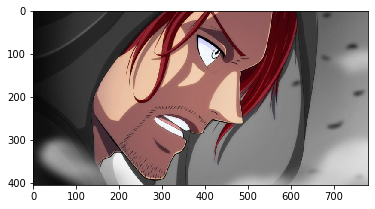

In [3]:
from PIL import Image
import requests
from matplotlib import pyplot as plt


url = 'https://cdn.alfabetajuega.com/wp-content/uploads/2019/07/shanks-one-piece-cara-780x405.jpg'
image = Image.open(requests.get(url, stream=True).raw) # retorna. un objeto de tipo imagen <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=580x330 at 0x7F8541EFE7D0>

data = np.asarray(image) / 255
plt.imshow(data, interpolation='nearest')




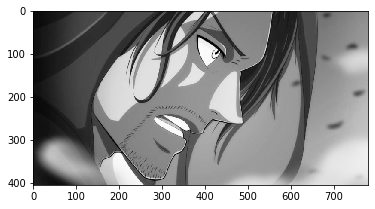

In [26]:
bn = 1 - np.mean(data, axis=2)

def show_image(matriz):
  plt.imshow(matriz, cmap='Greys', interpolation='nearest')
  plt.show()

show_image(bn)


# 1. Dibujarle un borde


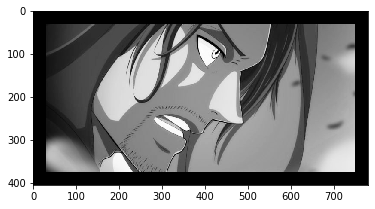

In [43]:
bn2 = bn.copy()
size = bn.shape
alto, ancho = size
bn2[0:30, :] = 1 # primeras 30 Filas
bn2[alto-30:alto, : ] = 1 # primeras 30 columnas
bn2[:, 0:30] = 1 # primeras 30 columnas
bn2[:, ancho-30:ancho] = 1 # primeras 30 columnas

show_image(bn2)

# 2. Determinar si la imagen es oscura o clara (sacar el promedio del color, si es mayor que 0.5 es oscura, si es menor es clara)

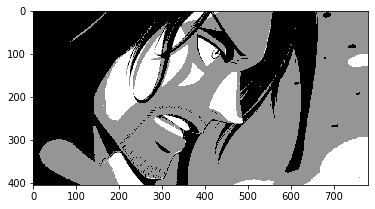

In [44]:
bn2 = bn.copy()
size = bn.shape
alto, ancho = size

bn2[bn2 < 0.3] = 0
bn2[bn2 >= 0.7] = 1
bn2[(bn2 != 1) & (bn2 != 0)] = 0.5

show_image(bn2)

In [81]:
bn2 = bn.copy()
p = np.mean(bn2)
print(" El Promedio de la imagen es  ", p)
if p > 0.5:
  print("\n La imagen es Oscura")
else:  
  print("\n La imagen es Clara")

 El Promedio de la imagen es   0.5796028444510654

 La imagen es Oscura


# 3. Aclarar los blancos y oscurecer los negros: 

# -  seleccionar aquellos que tengan menos de 0.5 y restarle - 50% del color:  color - (color * 0.5)

# -  seleccionar aquellos que tengan más de 0.5 y sumarle 50% del color:  color - (color * 0.5)

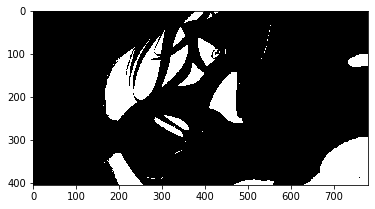

In [122]:
bn2 = bn.copy()
size = bn.shape
alto, ancho = size

bn2[bn2 < 0.3] = 0 - (0 * 0.5)
bn2[bn2 >= 0.6] = 1 - (1 * 0.5)
bn2[(bn2 != (1 - (1 * 0.5))) & (bn2 != (0 - (0 * 0.5)))] = 0.5

show_image(bn2)

# 4. Agregar ruido a la imagen: Sumar la matriz de la imagen + otra matriz del mismo tamaño que tenga números random.

Calculando la dimencion de la matriz de la imagen

In [97]:
bn.shape


(405, 780)

In [126]:
bn3 = np.empty( (405,780),)
print("\n La Matriz Bn2 es :")
print(bn3)



 La Matriz Bn2 es :
[[1.  1.  1.  ... 0.5 0.5 0.5]
 [1.  1.  1.  ... 0.5 0.5 0.5]
 [1.  1.  1.  ... 0.5 0.5 0.5]
 ...
 [1.  1.  1.  ... 0.  0.  0. ]
 [1.  1.  1.  ... 0.  0.  0. ]
 [1.  1.  1.  ... 0.  0.  0. ]]


Suma de la matriz de la imagen + la matriz bn3


[[1.96078431 1.96078431 1.96078431 ... 1.0372549  1.0372549  1.0372549 ]
 [1.96078431 1.96078431 1.96078431 ... 1.0372549  1.0372549  1.0372549 ]
 [1.96078431 1.96078431 1.96078431 ... 1.0372549  1.0372549  1.0372549 ]
 ...
 [1.89019608 1.89411765 1.89803922 ... 0.26666667 0.26666667 0.2627451 ]
 [1.89019608 1.89411765 1.89803922 ... 0.2745098  0.27058824 0.26666667]
 [1.89019608 1.89411765 1.89803922 ... 0.2745098  0.2745098  0.27058824]]


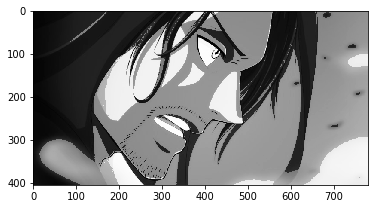

In [124]:
bn2 = bn.copy()
size = bn.shape
alto, ancho = size
Suma_MatrizImagen= bn2+bn3
print(Suma_MatrizImagen)
show_image(Suma_MatrizImagen)

In [127]:
Suma_MatrizImagen.shape

(405, 780)

# 5. Dibujar una escala de grises: usar enumerate para listar del 1 al 100, convertirla a matriz de numpy, y hacer reshape a 10 x 10:

In [141]:
np_array =list(range(100))
print("\n Lista de nuemros del 1-10 :",np_array, "\n")
np_array = np.array(np_array).reshape(10,10)
np_array




 Lista de nuemros del 1-10 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 



array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

# 6. Hacer la escala de grises del tamaño de la matriz de tu imagen

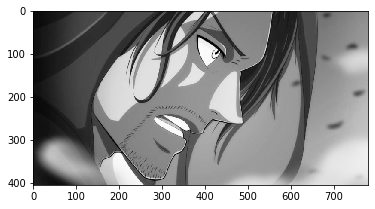

In [147]:
bn = 1 - np.mean(data, axis=2)

def show_image(matriz):
  plt.imshow(matriz, cmap='Greys', interpolation='nearest')
  plt.show()

show_image(bn)

In [149]:
bn


array([[0.96078431, 0.96078431, 0.96078431, ..., 0.5372549 , 0.5372549 ,
        0.5372549 ],
       [0.96078431, 0.96078431, 0.96078431, ..., 0.5372549 , 0.5372549 ,
        0.5372549 ],
       [0.96078431, 0.96078431, 0.96078431, ..., 0.5372549 , 0.5372549 ,
        0.5372549 ],
       ...,
       [0.89019608, 0.89411765, 0.89803922, ..., 0.26666667, 0.26666667,
        0.2627451 ],
       [0.89019608, 0.89411765, 0.89803922, ..., 0.2745098 , 0.27058824,
        0.26666667],
       [0.89019608, 0.89411765, 0.89803922, ..., 0.2745098 , 0.2745098 ,
        0.27058824]])

Escala de Grises

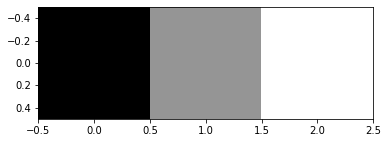

In [155]:
show_image(np.array([[1,0.5,0.0]]))

# 7. Unir la imagen de tu escala de grises + la imagen (deberiá verse una imagen con filtro de degradado :D )

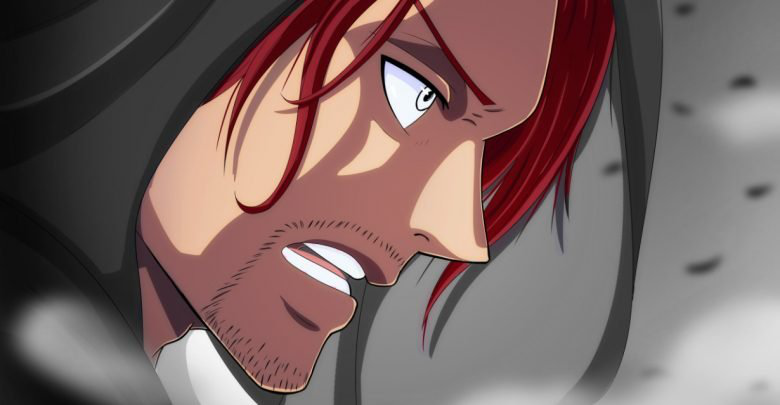

In [146]:
image

# 8. Dibujar un tablero de ajedrez

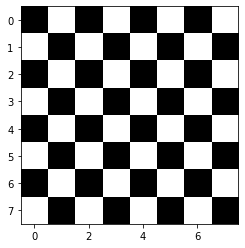

In [159]:
show_image(np.array([[1,0.0,1,0.0,1,0.0,1,0.0],
                     [0.0,1,0.0,1,0.0,1,0.0,1],
                     [1,0.0,1,0.0,1,0.0,1,0.0],
                     [0.0,1,0.0,1,0.0,1,0.0,1],
                     [1,0.0,1,0.0,1,0.0,1,0.0],
                     [0.0,1,0.0,1,0.0,1,0.0,1],
                     [1,0.0,1,0.0,1,0.0,1,0.0],
                     [0.0,1,0.0,1,0.0,1,0.0,1]

                     
                     ]))